<a href="https://colab.research.google.com/github/rosiam2020/Covid19_Amaz-nia/blob/main/ambiente_covid_amazonas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import warnings
warnings.filterwarnings ('ignore')

In [101]:
casos_amazonas = pd.read_excel ('dados_tempo_covidam_total.xlsx')
casos_amazonas.head ()

,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/mÂ²),Chuva (mm),covid_am,mortes
0,2020-03-13,1200,29.7,29.7,27.8,71.0,83.0,70.0,1004.6,1004.6,1004.2,2.2,64.0,4.7,759.29,0.0,2.0,0.0
1,2020-03-14,1200,24.5,26.9,24.5,93.0,93.0,85.0,1006.3,1006.3,1003.5,1.6,28.0,6.5,172.12,17.8,0.0,0.0
2,2020-03-15,1200,24.7,24.7,24.2,86.0,89.0,86.0,1007.9,1007.9,1007.2,1.4,103.0,4.2,279.32,0.0,0.0,0.0
3,2020-03-16,1200,27.5,27.7,26.5,82.0,89.0,82.0,1005.7,1005.7,1005.1,2.7,86.0,5.1,764.13,0.0,0.0,0.0
4,2020-03-17,1200,28.1,28.2,26.9,80.0,89.0,80.0,1006.0,1006.0,1005.1,1.5,63.0,3.4,589.49,0.0,0.0,0.0


In [102]:
df = casos_amazonas
df['data'] = pd.to_datetime(df['Data']).dt.date
df.head()

,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/mÂ²),Chuva (mm),covid_am,mortes,data
0,2020-03-13,1200,29.7,29.7,27.8,71.0,83.0,70.0,1004.6,1004.6,1004.2,2.2,64.0,4.7,759.29,0.0,2.0,0.0,2020-03-13
1,2020-03-14,1200,24.5,26.9,24.5,93.0,93.0,85.0,1006.3,1006.3,1003.5,1.6,28.0,6.5,172.12,17.8,0.0,0.0,2020-03-14
2,2020-03-15,1200,24.7,24.7,24.2,86.0,89.0,86.0,1007.9,1007.9,1007.2,1.4,103.0,4.2,279.32,0.0,0.0,0.0,2020-03-15
3,2020-03-16,1200,27.5,27.7,26.5,82.0,89.0,82.0,1005.7,1005.7,1005.1,2.7,86.0,5.1,764.13,0.0,0.0,0.0,2020-03-16
4,2020-03-17,1200,28.1,28.2,26.9,80.0,89.0,80.0,1006.0,1006.0,1005.1,1.5,63.0,3.4,589.49,0.0,0.0,0.0,2020-03-17


In [109]:

df['temp']=df['Temp. Ins. (C)']
df['umid']=df['Umi. Ins. (%)']
df['chu']=df['Chuva (mm)']
df['rad']=df['Radiacao (KJ/mÂ²)']
df['casos']=df['covid_am']
df['mortes']=df['mortes']



In [110]:
df['mediatemp_7'] = df.temp.rolling(window=7,center=False).mean()
df['mediatemp_14'] = df.temp.rolling(window=14,center=False).mean()
df['mediatemp_28'] = df.temp.rolling(window=28,center=False).mean()

df['mediaumid_7'] = df.umid.rolling(window=7,center=False).mean()
df['mediaumid_14'] = df.umid.rolling(window=14,center=False).mean()
df['mediaumid_28'] = df.umid.rolling(window=28,center=False).mean()

df['mediachuva_7'] = df.chu.rolling(window=7,center=False).mean()
df['mediachuva_14'] = df.chu.rolling(window=14,center=False).mean()
df['mediachuva_28'] = df.chu.rolling(window=28,center=False).mean()

df['mediarad_7'] = df.rad.rolling(window=7,center=False).mean()
df['mediarad_14'] = df.rad.rolling(window=14,center=False).mean()
df['mediarad_28'] = df.rad.rolling(window=28,center=False).mean()

df['mediacasos_7'] = df.casos.rolling(window=7,center=False).mean()
df['mediacasos_14'] = df.casos.rolling(window=14,center=False).mean()
df['mediacasos_28'] = df.casos.rolling(window=28,center=False).mean()

df['mediamortes_7'] = df.mortes.rolling(window=7,center=False).mean()
df['mediamortes_14'] = df.mortes.rolling(window=14,center=False).mean()
df['mediamortes_28'] = df.mortes.rolling(window=28,center=False).mean()




In [111]:
plt.rcParams.update({'font.size':16})

**Correlações da variáveis ambientais com os Casos de Covid19 - AM - Desde o primeiro caso até 20/01/2022**




In [112]:
print(df)

column_1 = df["casos"]
column_2 = df["temp"]

column_3 = df["mediacasos_7"]
column_4 = df["mediatemp_7"]

column_5 = df["mediacasos_14"]
column_6 = df["mediatemp_14"]

column_7 = df["mediacasos_28"]
column_8 = df["mediatemp_28"]

correlation1 = column_1. corr(column_2) 
correlation2 = column_3. corr(column_4)
correlation3 = column_5. corr(column_6) 
correlation4 = column_7. corr(column_8)

print(correlation1, correlation2, correlation3, correlation4)

          Data  Hora (UTC)  ...  mediamortes_14  mediamortes_28
0   2020-03-13        1200  ...             NaN             NaN
1   2020-03-14        1200  ...             NaN             NaN
2   2020-03-15        1200  ...             NaN             NaN
3   2020-03-16        1200  ...             NaN             NaN
4   2020-03-17        1200  ...             NaN             NaN
..         ...         ...  ...             ...             ...
674 2022-01-16        1200  ...        1.428571        1.321429
675 2022-01-17        1200  ...        1.428571        1.357143
676 2022-01-18        1200  ...        1.571429        1.357143
677 2022-01-19        1200  ...        1.714286        1.464286
678 2022-01-20        1200  ...             NaN             NaN

[679 rows x 42 columns]
-0.20487318334296525 -0.3837305919778026 -0.44275383437294985 -0.5143039425386123


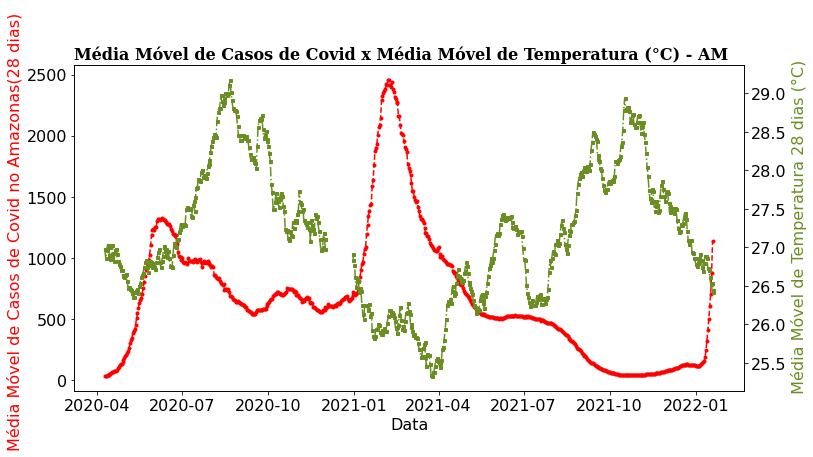

In [113]:
x=df['data']
y4=df['mediatemp_28']
y5=df['mediacasos_28']
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel('Data')
ax1.set_ylabel('Média Móvel de Casos de Covid no Amazonas(28 dias) ', color='red')
ax1.plot(x, y5, color='red', marker = 'o', markersize = 3, linestyle= '--')

ax2 = ax1.twinx()  
ax2.set_ylabel(' Média Móvel de Temperatura 28 dias (°C)', color='olivedrab')  

ax2.plot(x, y4, color = 'olivedrab',  marker = 's', markersize = 3, linestyle= '-.')
plt.title("Média Móvel de Casos de Covid x Média Móvel de Temperatura (°C) - AM", 
          fontdict={'family': 'serif', 
                    'color' : 'Black',
                    'weight': 'bold',
                    'size': 16},
          loc='left')

plt.show()

In [114]:
column_1 = df["casos"]
column_2 = df["umid"]

column_3 = df["mediacasos_7"]
column_4 = df["mediaumid_7"]

column_5 = df["mediacasos_14"]
column_6 = df["mediaumid_14"]

column_7 = df["mediacasos_28"]
column_8 = df["mediaumid_28"]

correlation1 = column_1. corr(column_2) 
correlation2 = column_3. corr(column_4)
correlation3 = column_5. corr(column_6) 
correlation4 = column_7. corr(column_8)

print(correlation1, correlation2, correlation3, correlation4)

0.21132244116663898 0.33851157201706056 0.37254115515927355 0.41749384191211253


Text(0.0, 1.0, 'Média Móvel de Casos de Covid x Média Móvel de Umidade Relativa (%) - AM')

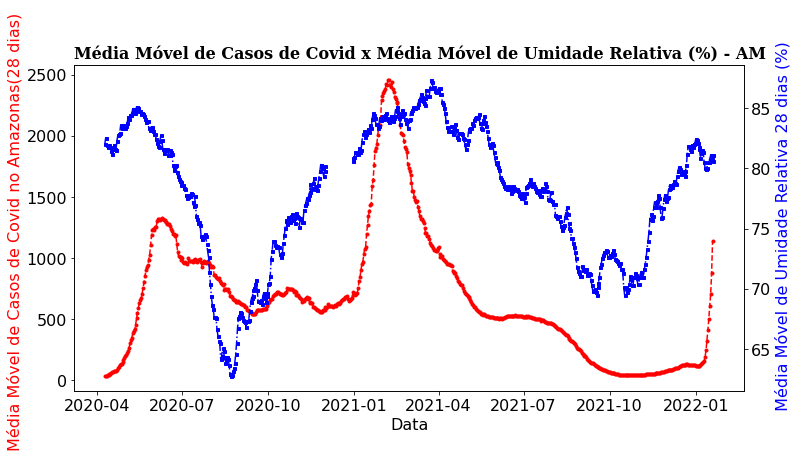

In [115]:
x=df['data']
y4=df['mediaumid_28']
y5=df['mediacasos_28']
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel('Data')
ax1.set_ylabel('Média Móvel de Casos de Covid no Amazonas(28 dias) ', color='red')
ax1.plot(x, y5, color='red', marker = 'o', markersize = 3, linestyle= '--')

ax2 = ax1.twinx()  
ax2.set_ylabel(' Média Móvel de Umidade Relativa 28 dias (%)', color='blue')  

ax2.plot(x, y4, color = 'blue',  marker = 's', markersize = 3, linestyle= '-.')
plt.title("Média Móvel de Casos de Covid x Média Móvel de Umidade Relativa (%) - AM", 
          fontdict={'family': 'serif', 
                    'color' : 'Black',
                    'weight': 'bold',
                    'size': 16},
          loc='left')

In [116]:
print(df)

column_1 = df["casos"]
column_2 = df["chu"]

column_3 = df["mediacasos_7"]
column_4 = df["mediachuva_7"]

column_5 = df["mediacasos_14"]
column_6 = df["mediachuva_14"]

column_7 = df["mediacasos_28"]
column_8 = df["mediachuva_28"]

correlation1 = column_1. corr(column_2) 
correlation2 = column_3. corr(column_4)
correlation3 = column_5. corr(column_6) 
correlation4 = column_7. corr(column_8)

print(correlation1, correlation2, correlation3, correlation4)

          Data  Hora (UTC)  ...  mediamortes_14  mediamortes_28
0   2020-03-13        1200  ...             NaN             NaN
1   2020-03-14        1200  ...             NaN             NaN
2   2020-03-15        1200  ...             NaN             NaN
3   2020-03-16        1200  ...             NaN             NaN
4   2020-03-17        1200  ...             NaN             NaN
..         ...         ...  ...             ...             ...
674 2022-01-16        1200  ...        1.428571        1.321429
675 2022-01-17        1200  ...        1.428571        1.357143
676 2022-01-18        1200  ...        1.571429        1.357143
677 2022-01-19        1200  ...        1.714286        1.464286
678 2022-01-20        1200  ...             NaN             NaN

[679 rows x 42 columns]
0.06528361527625122 0.17799427194831496 0.22402984969089318 0.2985151297867916


Text(0.0, 1.0, 'Média Móvel de Casos de Covid x Média Móvel da Chuva (mm) - AM')

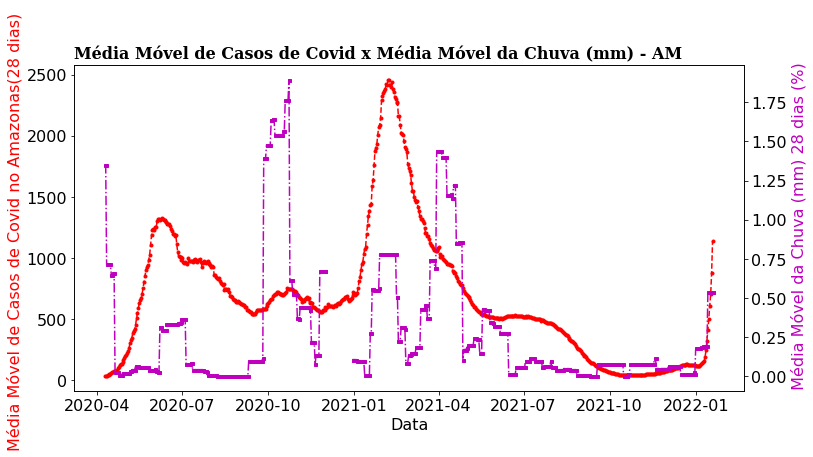

In [119]:
x=df['data']
y4=df['mediachuva_28']
y5=df['mediacasos_28']
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel('Data')
ax1.set_ylabel('Média Móvel de Casos de Covid no Amazonas(28 dias) ', color='red')
ax1.plot(x, y5, color='red', marker = 'o', markersize = 3, linestyle= '--')

ax2 = ax1.twinx()  
ax2.set_ylabel(' Média Móvel da Chuva (mm) 28 dias (%)', color='m')  

ax2.plot(x, y4, color = 'm',  marker = 's', markersize = 3, linestyle= '-.')
plt.title("Média Móvel de Casos de Covid x Média Móvel da Chuva (mm) - AM", 
          fontdict={'family': 'serif', 
                    'color' : 'Black',
                    'weight': 'bold',
                    'size': 16},
          loc='left')

In [120]:
print(df)

column_1 = df["casos"]
column_2 = df["rad"]

column_3 = df["mediacasos_7"]
column_4 = df["mediarad_7"]

column_5 = df["mediacasos_14"]
column_6 = df["mediarad_14"]

column_7 = df["mediacasos_28"]
column_8 = df["mediarad_28"]

correlation1 = column_1. corr(column_2) 
correlation2 = column_3. corr(column_4)
correlation3 = column_5. corr(column_6) 
correlation4 = column_7. corr(column_8)

print(correlation1, correlation2, correlation3, correlation4)

          Data  Hora (UTC)  ...  mediamortes_14  mediamortes_28
0   2020-03-13        1200  ...             NaN             NaN
1   2020-03-14        1200  ...             NaN             NaN
2   2020-03-15        1200  ...             NaN             NaN
3   2020-03-16        1200  ...             NaN             NaN
4   2020-03-17        1200  ...             NaN             NaN
..         ...         ...  ...             ...             ...
674 2022-01-16        1200  ...        1.428571        1.321429
675 2022-01-17        1200  ...        1.428571        1.357143
676 2022-01-18        1200  ...        1.571429        1.357143
677 2022-01-19        1200  ...        1.714286        1.464286
678 2022-01-20        1200  ...             NaN             NaN

[679 rows x 42 columns]
-0.17384945467313384 -0.41182041963418775 -0.4724654451709913 -0.5367484973631803


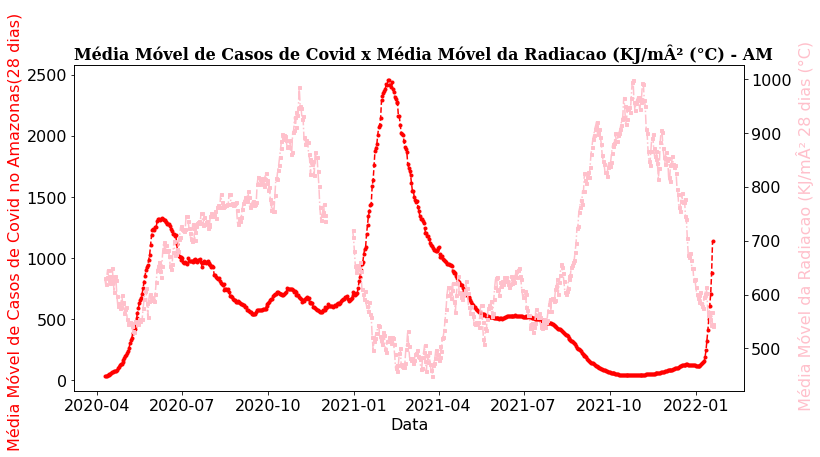

In [121]:
x=df['data']
y4=df['mediarad_28']
y5=df['mediacasos_28']
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel('Data')
ax1.set_ylabel('Média Móvel de Casos de Covid no Amazonas(28 dias) ', color='red')
ax1.plot(x, y5, color='red', marker = 'o', markersize = 3, linestyle= '--')

ax2 = ax1.twinx()  
ax2.set_ylabel(' Média Móvel da Radiacao (KJ/mÂ² 28 dias (°C)', color='pink')  

ax2.plot(x, y4, color = 'pink',  marker = 's', markersize = 3, linestyle= '-.')
plt.title("Média Móvel de Casos de Covid x Média Móvel da Radiacao (KJ/mÂ² (°C) - AM", 
          fontdict={'family': 'serif', 
                    'color' : 'Black',
                    'weight': 'bold',
                    'size': 16},
          loc='left')

plt.show()

**Correlações da variáveis ambientais com Mortes por Covid19- AM - Desde o primeiro caso até 20/01/2022**

In [122]:
print(df)

column_1 = df["mortes"]
column_2 = df["temp"]

column_3 = df["mediamortes_7"]
column_4 = df["mediatemp_7"]

column_5 = df["mediamortes_14"]
column_6 = df["mediatemp_14"]

column_7 = df["mediamortes_28"]
column_8 = df["mediatemp_28"]

correlation1 = column_1. corr(column_2) 
correlation2 = column_3. corr(column_4)
correlation3 = column_5. corr(column_6) 
correlation4 = column_7. corr(column_8)

print(correlation1, correlation2, correlation3, correlation4)

          Data  Hora (UTC)  ...  mediamortes_14  mediamortes_28
0   2020-03-13        1200  ...             NaN             NaN
1   2020-03-14        1200  ...             NaN             NaN
2   2020-03-15        1200  ...             NaN             NaN
3   2020-03-16        1200  ...             NaN             NaN
4   2020-03-17        1200  ...             NaN             NaN
..         ...         ...  ...             ...             ...
674 2022-01-16        1200  ...        1.428571        1.321429
675 2022-01-17        1200  ...        1.428571        1.357143
676 2022-01-18        1200  ...        1.571429        1.357143
677 2022-01-19        1200  ...        1.714286        1.464286
678 2022-01-20        1200  ...             NaN             NaN

[679 rows x 42 columns]
-0.21508009031308772 -0.3917790164076968 -0.46393818622151023 -0.551780750927077


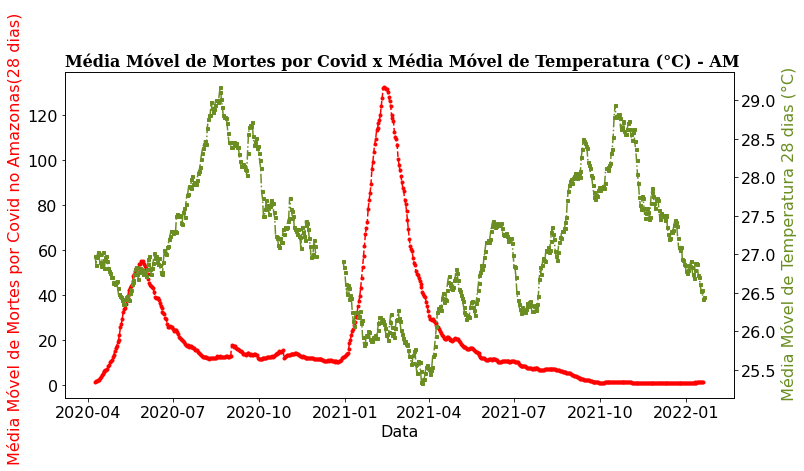

In [123]:
x=df['data']
y4=df['mediatemp_28']
y5=df['mediamortes_28']
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel('Data')
ax1.set_ylabel('Média Móvel de Mortes por Covid no Amazonas(28 dias) ', color='red')
ax1.plot(x, y5, color='red', marker = 'o', markersize = 3, linestyle= '--')

ax2 = ax1.twinx()  
ax2.set_ylabel(' Média Móvel de Temperatura 28 dias (°C)', color='olivedrab')  

ax2.plot(x, y4, color = 'olivedrab',  marker = 's', markersize = 3, linestyle= '-.')
plt.title("Média Móvel de Mortes por Covid x Média Móvel de Temperatura (°C) - AM", 
          fontdict={'family': 'serif', 
                    'color' : 'Black',
                    'weight': 'bold',
                    'size': 16},
          loc='left')

plt.show()

In [124]:
column_1 = df["mortes"]
column_2 = df["umid"]

column_3 = df["mediamortes_7"]
column_4 = df["mediaumid_7"]

column_5 = df["mediamortes_14"]
column_6 = df["mediaumid_14"]

column_7 = df["mediamortes_28"]
column_8 = df["mediaumid_28"]

correlation1 = column_1. corr(column_2) 
correlation2 = column_3. corr(column_4)
correlation3 = column_5. corr(column_6) 
correlation4 = column_7. corr(column_8)

print(correlation1, correlation2, correlation3, correlation4)

0.25317573257512366 0.39931467674914006 0.45060617493625066 0.5020191613271017


Text(0.0, 1.0, 'Média Móvel de Mortes por Covid x Média Móvel de Umidade Relativa (%) - AM')

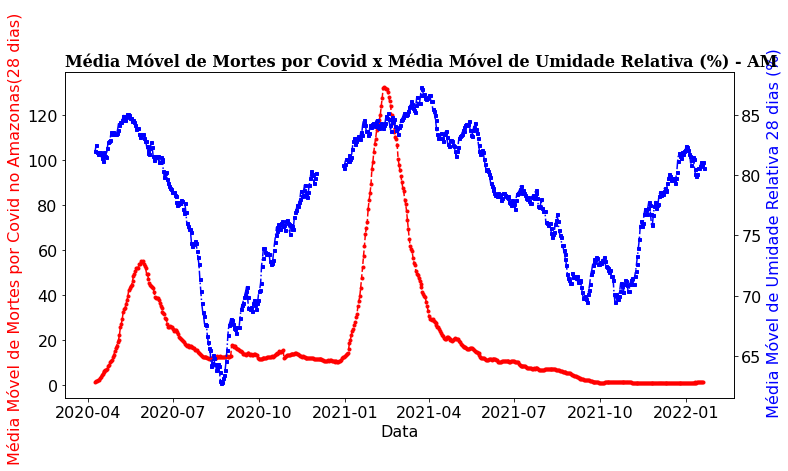

In [125]:
x=df['data']
y4=df['mediaumid_28']
y5=df['mediamortes_28']
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel('Data')
ax1.set_ylabel('Média Móvel de Mortes por Covid no Amazonas(28 dias) ', color='red')
ax1.plot(x, y5, color='red', marker = 'o', markersize = 3, linestyle= '--')

ax2 = ax1.twinx()  
ax2.set_ylabel(' Média Móvel de Umidade Relativa 28 dias (%)', color='blue')  

ax2.plot(x, y4, color = 'blue',  marker = 's', markersize = 3, linestyle= '-.')
plt.title("Média Móvel de Mortes por Covid x Média Móvel de Umidade Relativa (%) - AM", 
          fontdict={'family': 'serif', 
                    'color' : 'Black',
                    'weight': 'bold',
                    'size': 16},
          loc='left')

In [126]:
print(df)

column_1 = df["mortes"]
column_2 = df["chu"]

column_3 = df["mediamortes_7"]
column_4 = df["mediachuva_7"]

column_5 = df["mediamortes_14"]
column_6 = df["mediachuva_14"]

column_7 = df["mediamortes_28"]
column_8 = df["mediachuva_28"]

correlation1 = column_1. corr(column_2) 
correlation2 = column_3. corr(column_4)
correlation3 = column_5. corr(column_6) 
correlation4 = column_7. corr(column_8)

print(correlation1, correlation2, correlation3, correlation4)

          Data  Hora (UTC)  ...  mediamortes_14  mediamortes_28
0   2020-03-13        1200  ...             NaN             NaN
1   2020-03-14        1200  ...             NaN             NaN
2   2020-03-15        1200  ...             NaN             NaN
3   2020-03-16        1200  ...             NaN             NaN
4   2020-03-17        1200  ...             NaN             NaN
..         ...         ...  ...             ...             ...
674 2022-01-16        1200  ...        1.428571        1.321429
675 2022-01-17        1200  ...        1.428571        1.357143
676 2022-01-18        1200  ...        1.571429        1.357143
677 2022-01-19        1200  ...        1.714286        1.464286
678 2022-01-20        1200  ...             NaN             NaN

[679 rows x 42 columns]
0.023546173411102232 0.0861391492121982 0.1270533455343079 0.19143602414583683


Text(0.0, 1.0, 'Média Móvel Mortes por Covid x Média Móvel da Chuva (mm) - AM')

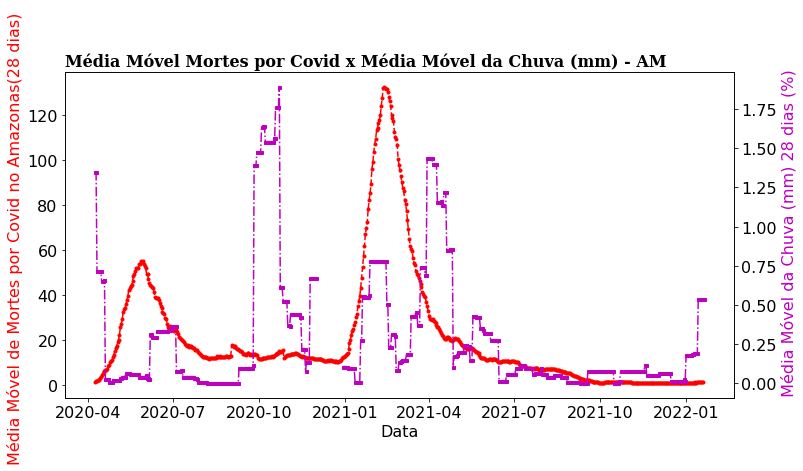

In [127]:
x=df['data']
y4=df['mediachuva_28']
y5=df['mediamortes_28']
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel('Data')
ax1.set_ylabel('Média Móvel de Mortes por Covid no Amazonas(28 dias) ', color='red')
ax1.plot(x, y5, color='red', marker = 'o', markersize = 3, linestyle= '--')

ax2 = ax1.twinx()  
ax2.set_ylabel(' Média Móvel da Chuva (mm) 28 dias (%)', color='m')  

ax2.plot(x, y4, color = 'm',  marker = 's', markersize = 3, linestyle= '-.')
plt.title("Média Móvel Mortes por Covid x Média Móvel da Chuva (mm) - AM", 
          fontdict={'family': 'serif', 
                    'color' : 'Black',
                    'weight': 'bold',
                    'size': 16},
          loc='left')

In [128]:
print(df)

column_1 = df["mortes"]
column_2 = df["rad"]

column_3 = df["mediamortes_7"]
column_4 = df["mediarad_7"]

column_5 = df["mediamortes_14"]
column_6 = df["mediarad_14"]

column_7 = df["mediamortes_28"]
column_8 = df["mediarad_28"]

correlation1 = column_1. corr(column_2) 
correlation2 = column_3. corr(column_4)
correlation3 = column_5. corr(column_6) 
correlation4 = column_7. corr(column_8)

print(correlation1, correlation2, correlation3, correlation4)

          Data  Hora (UTC)  ...  mediamortes_14  mediamortes_28
0   2020-03-13        1200  ...             NaN             NaN
1   2020-03-14        1200  ...             NaN             NaN
2   2020-03-15        1200  ...             NaN             NaN
3   2020-03-16        1200  ...             NaN             NaN
4   2020-03-17        1200  ...             NaN             NaN
..         ...         ...  ...             ...             ...
674 2022-01-16        1200  ...        1.428571        1.321429
675 2022-01-17        1200  ...        1.428571        1.357143
676 2022-01-18        1200  ...        1.571429        1.357143
677 2022-01-19        1200  ...        1.714286        1.464286
678 2022-01-20        1200  ...             NaN             NaN

[679 rows x 42 columns]
-0.1795448967267003 -0.4129040671354368 -0.49029991764168807 -0.5606040910707027


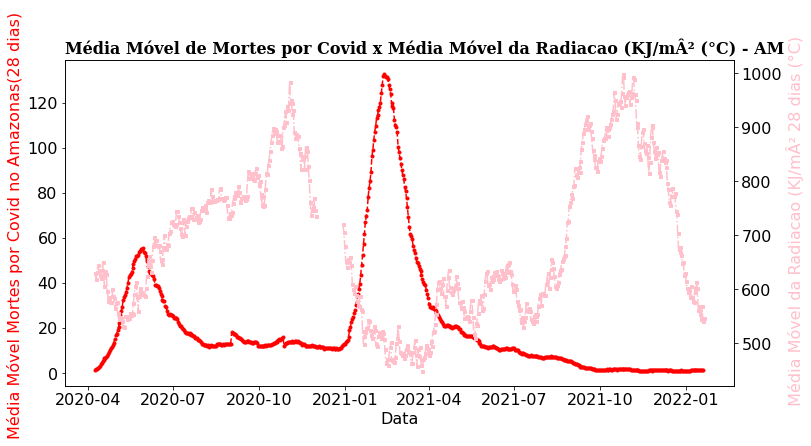

In [129]:
x=df['data']
y4=df['mediarad_28']
y5=df['mediamortes_28']
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel('Data')
ax1.set_ylabel('Média Móvel Mortes por Covid no Amazonas(28 dias) ', color='red')
ax1.plot(x, y5, color='red', marker = 'o', markersize = 3, linestyle= '--')

ax2 = ax1.twinx()  
ax2.set_ylabel(' Média Móvel da Radiacao (KJ/mÂ² 28 dias (°C)', color='pink')  

ax2.plot(x, y4, color = 'pink',  marker = 's', markersize = 3, linestyle= '-.')
plt.title("Média Móvel de Mortes por Covid x Média Móvel da Radiacao (KJ/mÂ² (°C) - AM", 
          fontdict={'family': 'serif', 
                    'color' : 'Black',
                    'weight': 'bold',
                    'size': 16},
          loc='left')

plt.show()